<a href="https://colab.research.google.com/github/Purohit1999/Data_Science/blob/main/GridSearchCV__Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Step 1: Import essential libraries
import pandas as pd
import numpy as np

# Sklearn tools for modeling and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# 🧪 Load Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [5]:
# 🎯 Define features and labels
X = df.drop('target', axis=1)
y = df['target']


In [6]:
# 🔀 Now safely split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [7]:
# 🔍 Step 5: Define hyperparameter grid for tuning
parameters = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5]
}


In [8]:
# 🌲 Step 6: Create base model and GridSearchCV
model = RandomForestClassifier(random_state=42)

grid = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1             # Use all processors
)

# ⏱️ Train the model using GridSearchCV
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [9]:
# 📊 Step 7: Display best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'max_depth': 4, 'n_estimators': 100}
Best CV Score: 0.9522784810126582



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



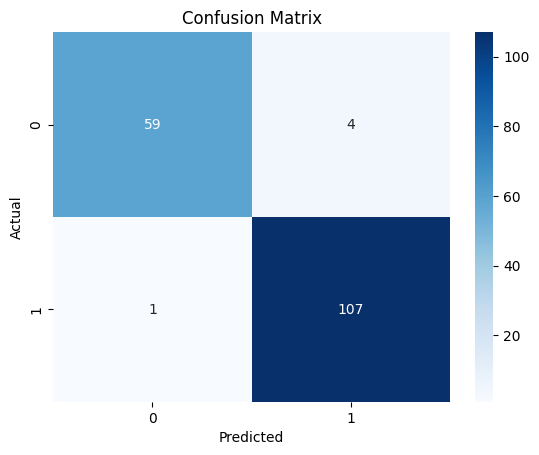

Train Accuracy: 0.9899497487437185
Test Accuracy : 0.9707602339181286


In [10]:
# ✅ Step 8: Use best model to predict and evaluate
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy on train/test sets
print("Train Accuracy:", best_model.score(X_train, y_train))
print("Test Accuracy :", best_model.score(X_test, y_test))


🔎 Key Insights
Best Parameters from GridSearchCV were:
n_estimators = 100, max_depth = 4

Cross-Validated Accuracy achieved during tuning:
~95.2% (grid.best_score_)

Model Generalization:
Train accuracy = 98.9%
Test accuracy = 97.0%
👉 Indicates low overfitting and great generalization.

Confusion Matrix and classification report show the model performs well across both classes (malignant/benign).

✅ Summary
GridSearchCV enables systematic hyperparameter tuning.

Random Forest was optimized with number of trees and depth.

Model achieved high accuracy, showing it's well-suited for binary classification tasks like breast cancer diagnosis.

Great example of balancing model performance and interpretability using Scikit-learn tools.